In [100]:
import seaborn as sns
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/DATA PYTHON/hypothesis_car.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

##Univariate analysis

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

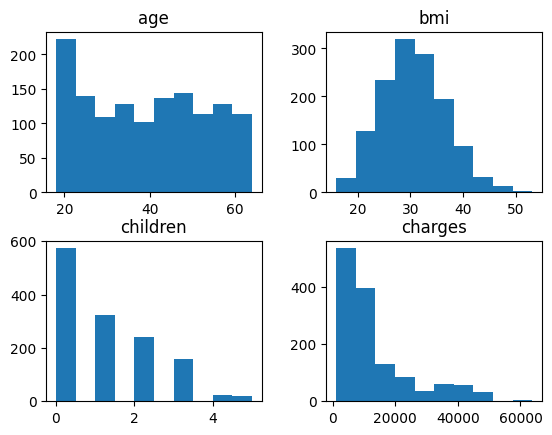

In [26]:
df.hist(grid=False)

In [38]:
insured=df.copy()

In [40]:
#changing object dtype to category  to save memory
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")

In [41]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [42]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [35]:
def dist_box(df):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=df.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=df.mean()
    median=df.median()
    mode=df.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=df,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(df,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

<ipython-input-35-498c434e6779>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,kde=False,color='blue',ax=ax_dis)
<ipython-input-35-498c434e6779>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,kde=False,color='blue',ax=ax_dis)
<ipython-input-35-498c434e6779>:12: UserWarning: 

`distpl

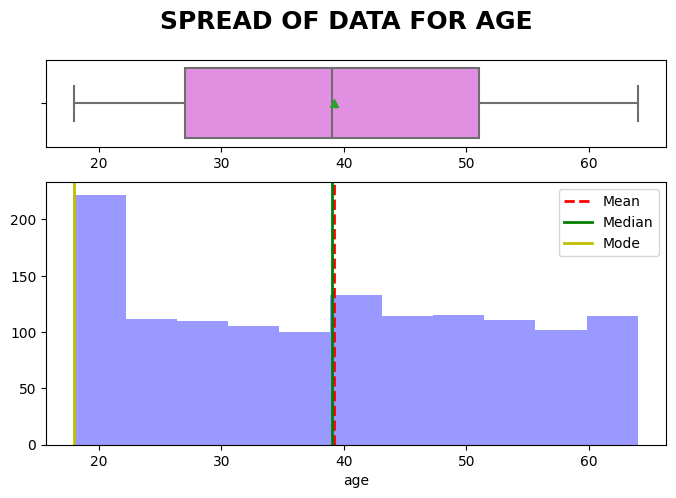

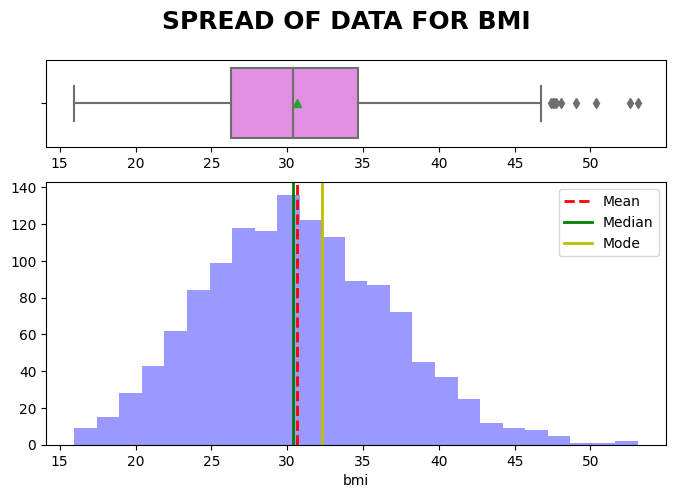

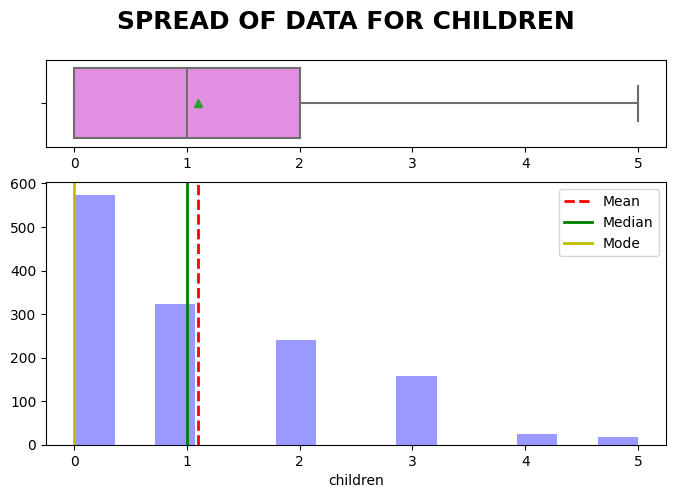

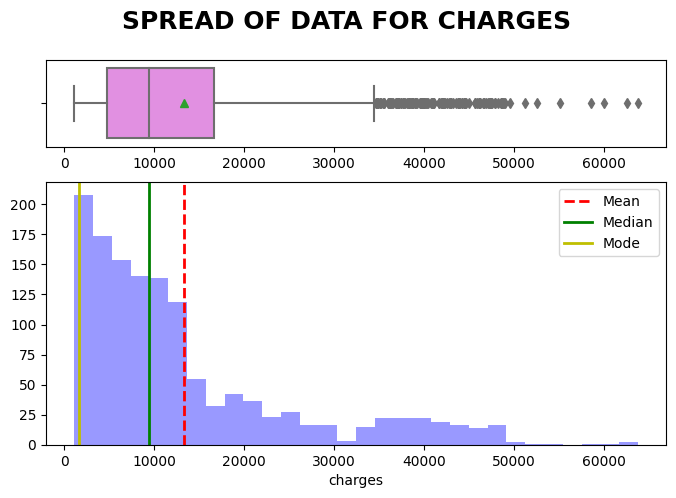

In [43]:
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(insured[list_col[i]])


##Observations

Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.

Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
Most of the beneficary have no childrens.

Charges distrubution is unimodal and is right skewed .Average cost incured to the insurance is appro. 130000 and highest charge is 63770.
There are lot of outliers at upper end.

##Bivariate Analysis

[Text(0, 5, '547'), Text(0, 5, '517')]

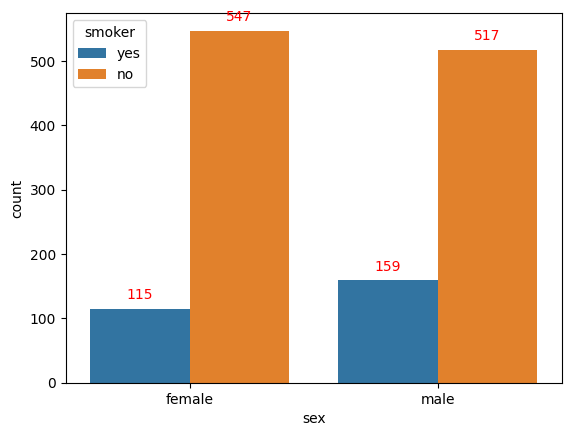

In [25]:
ss=sns.countplot(data=df,x='sex',hue='smoker')
ss.bar_label(ss.containers[0],padding=5,color='red')
ss.bar_label(ss.containers[1],padding=5,color='red')

<ipython-input-17-cfff015d229b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,y='age',x='sex',hue='smoker',ci=False)


<Axes: xlabel='sex', ylabel='age'>

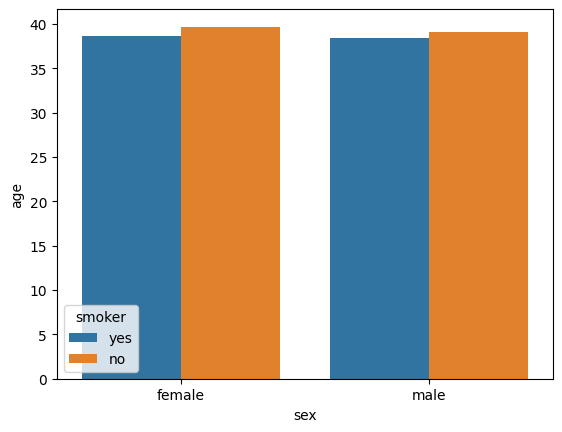

In [17]:
sns.barplot(data=df,y='age',x='sex',hue='smoker',ci=False)

<ipython-input-32-1f3d49884b13>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x='region',y='bmi',hue='sex',ci=False);


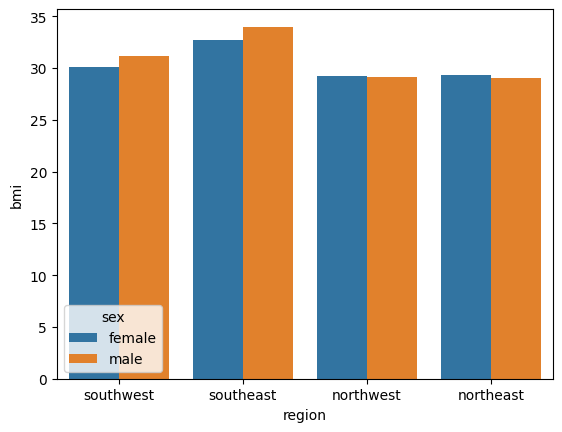

In [32]:
sns.barplot(data=df,x='region',y='bmi',hue='sex',ci=False);

<ipython-input-46-a0b67b098c02>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x='smoker',y='charges',ci=False)


<Axes: xlabel='smoker', ylabel='charges'>

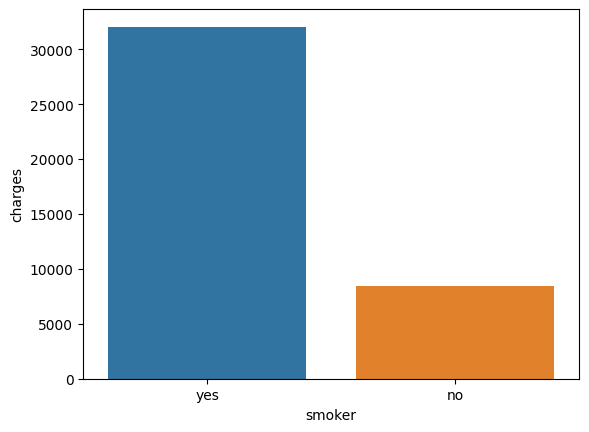

In [46]:
sns.barplot(data=df,x='smoker',y='charges',ci=False)

<ipython-input-48-b8469de2554e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=insured.sex,y=insured.charges,ci=False).set(title='Sex Vs Charges')


[Text(0.5, 1.0, 'Sex Vs Charges')]

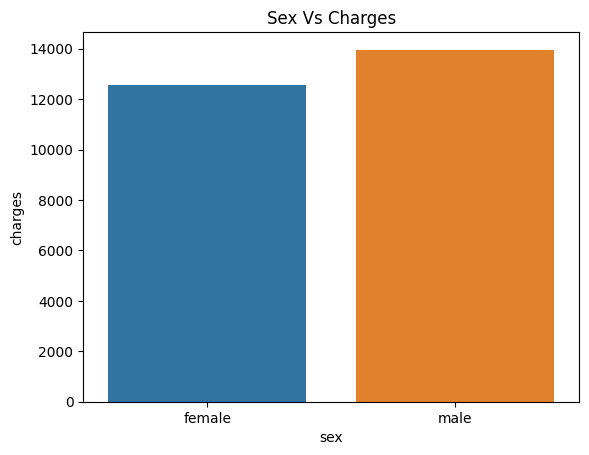

In [48]:
sns.barplot(x=insured.sex,y=insured.charges,ci=False).set(title='Sex Vs Charges')

<ipython-input-52-0b2b62812015>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='region',y='charges',hue='smoker', data=insured,ci=False).set(title='Region Vs Charges')


[Text(0.5, 1.0, 'Region Vs Charges')]

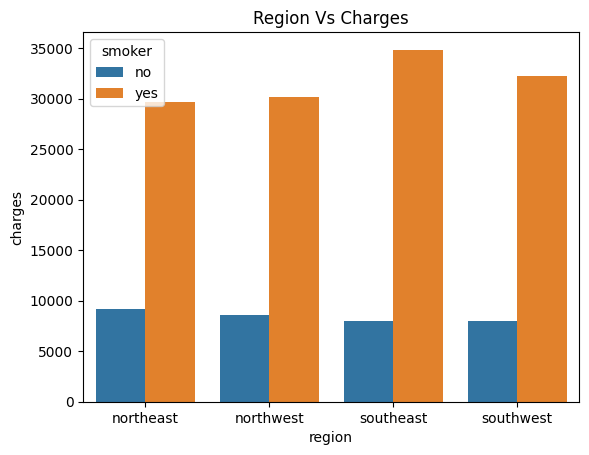

In [52]:
sns.barplot(x='region',y='charges',hue='smoker', data=insured,ci=False).set(title='Region Vs Charges')

<ipython-input-54-3da0e94aa294>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=insured, x="age", y="charges", hue="sex", ci=0)


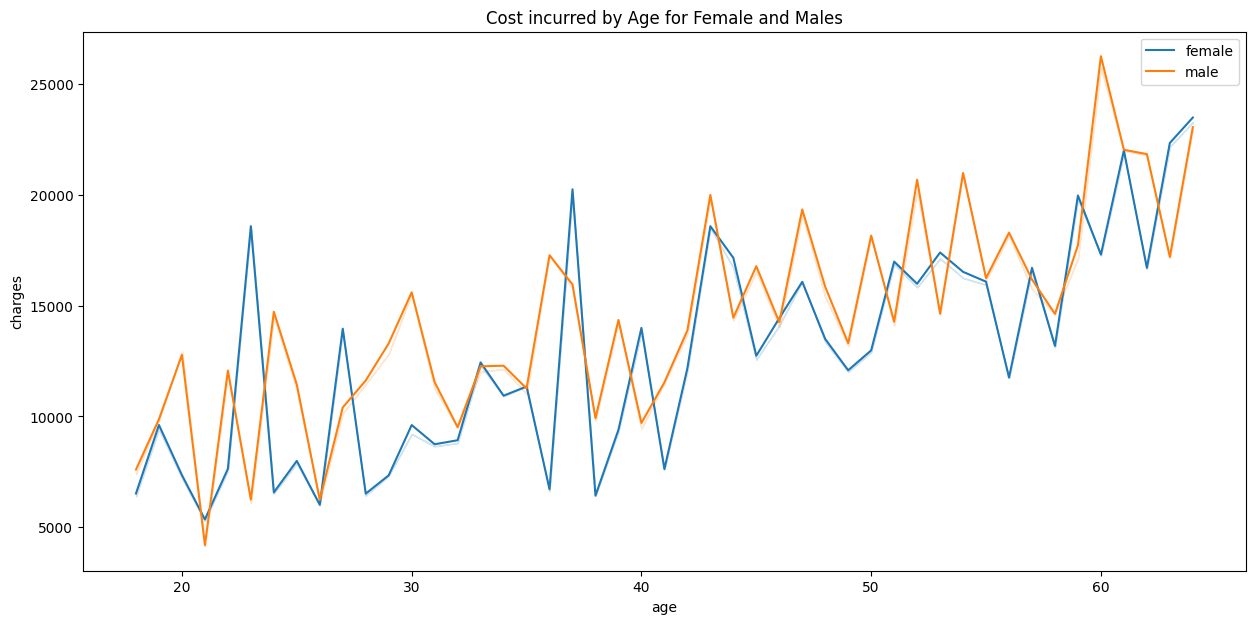

In [54]:

plt.figure(figsize=(15, 7))
sns.lineplot(data=insured, x="age", y="charges", hue="sex", ci=0)
plt.title('Cost incurred by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

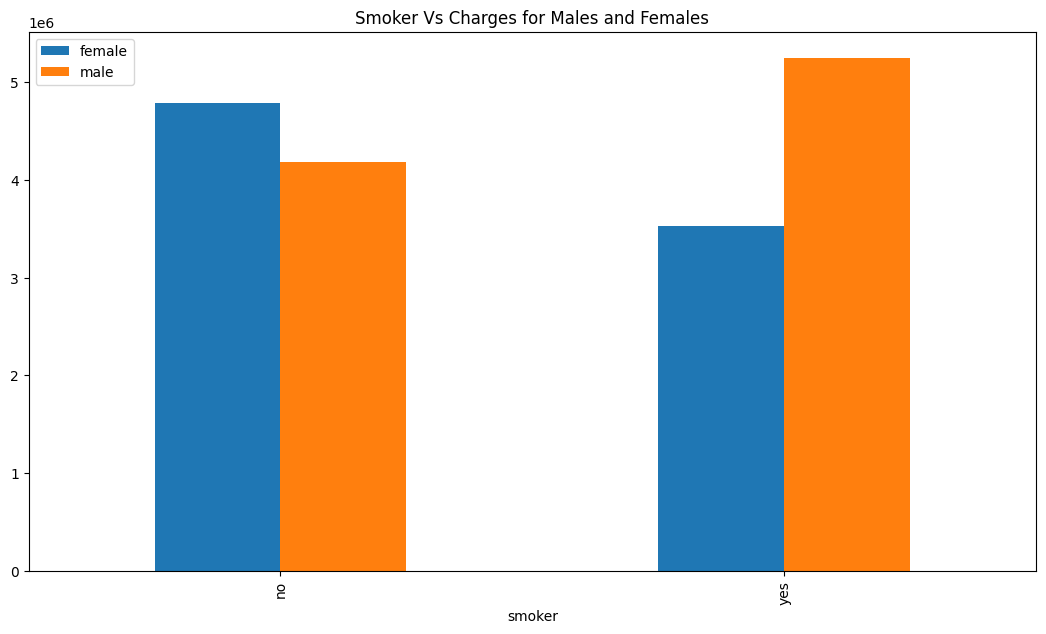

In [55]:
df_smoker_char_sex=pd.crosstab(index=insured.smoker,columns=insured.sex , values=insured.charges,aggfunc='sum')
fig1, axes1=plt.subplots(1,1,figsize=(13, 7))
df_smoker_char_sex.plot(kind='bar',ax=axes1,title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

Charges incurred for males are more than charges incured for females
With increasing age of policy holder charges incured are going high for both male and female.


There some spikes for female at an approximate ages of 23,28,43.
Most claims are from southeast regions.


Males who smoke have most claims and have higher bills
Number of claims made by female who dont smoke is more compared to female who smoke.

##Multivariate analysis

<ipython-input-44-72337627490f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insured.corr(),annot=True ,cmap="YlGn" )


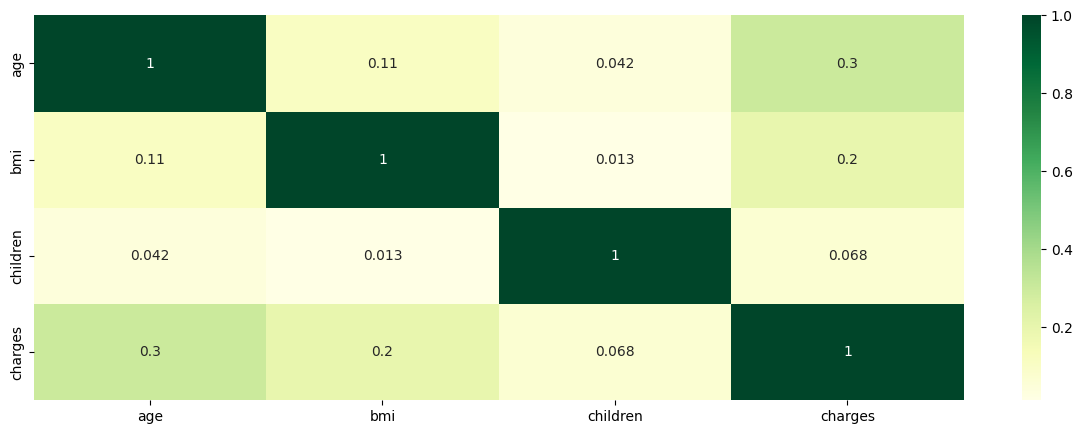

In [44]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [72]:
#creating groups of bmi
category=pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)

In [74]:
#no of children has no relation with charges
insured.groupby(insured.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [75]:
insured.groupby(['BMIGroup','sex'])['charges'].mean()

BMIGroup  sex   
15-25     female    10912.823025
          male       9574.481206
25-35     female    11999.488145
          male      13428.116735
35-45     female    14937.032222
          male      18663.708595
45-55     female    25928.806464
          male      11960.673608
Name: charges, dtype: float64

In [85]:
insured.groupby(['region','smoker','sex']).mean()['charges'].unstack()

<ipython-input-85-e219889e18b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  insured.groupby(['region','smoker','sex']).mean()['charges'].unstack()


sex                     female          male
region    smoker                            
northeast no       9640.426984   8664.042222
          yes     28032.046398  30926.252583
northwest no       8786.998679   8320.689321
          yes     29670.824946  30713.181419
southeast no       8440.205552   7609.003587
          yes     33034.820716  36029.839367
southwest no       8234.091260   7778.905534
          yes     31687.988430  32598.862854

##Observations

FeMales with most BMI has incured most charges to the insurance company
BMI for male and females are not same
Beneficary with higher BMI have incurred more cost to insurance.

In [86]:
pd.crosstab(insured['sex'],insured['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [88]:
category1=pd.cut(insured.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

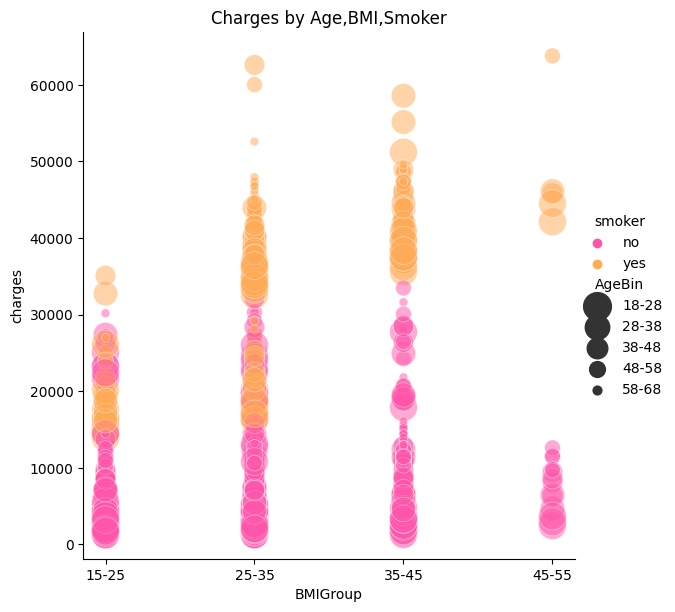

In [89]:
sns.relplot(x=insured.BMIGroup, y=insured.charges, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

##Conclusion based on EDA

As expected , as the age of the beneficiary increases ,the cost to insurance increases.

Males who smoke have most claims and have higher bills.

Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.

Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.This is unusual and may be because of uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.

Customer with bmi >30 are on higher side of obesity, have more health issues and have higher claims.

Females with BMI more than 45 have billed higher to insurance.
Age, BMI and Smoking are important attributes which can cost insurance company more

##1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

Step 1: Define null and alternative hypothesis

 H0:μ1<=μ2

  The average charges of smokers is less than or equal to nonsmokers


 Ha:μ1>μ2


  The average charges of smokers is greater than nonsmokers

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step 3: Identify the test
Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling distribution curve.

Step 4: Calculate the test-statistics and p-value

In [92]:
smoker=insured.loc[insured.smoker=='yes']
smoker

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.900,0,yes,25-35,18-28,southwest,16884.92400
11,62,female,26.290,0,yes,25-35,58-68,southeast,27808.72510
14,27,male,42.130,0,yes,35-45,18-28,southeast,39611.75770
19,30,male,35.300,0,yes,35-45,28-38,southwest,36837.46700
23,34,female,31.920,1,yes,25-35,28-38,northeast,37701.87680
...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,25-35,18-28,southwest,36397.57600
1314,30,female,23.655,3,yes,15-25,28-38,northwest,18765.87545
1321,62,male,26.695,0,yes,25-35,58-68,northeast,28101.33305
1323,42,female,40.370,2,yes,35-45,38-48,southeast,43896.37630


In [95]:
non_smoker=insured.loc[insured.smoker=="no"]
non_smoker

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,35-45,48-58,southwest,11411.68500
1333,50,male,30.970,3,no,25-35,48-58,northwest,10600.54830
1334,18,female,31.920,0,no,25-35,NaN,northeast,2205.98080
1335,18,female,36.850,0,no,35-45,NaN,southeast,1629.83350


In [97]:
# Adjusting the size of the rows to be equal
non_smoker = non_smoker[-274:]
charges_yes = smoker.charges
charges_no = non_smoker.charges

In [98]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23183153284 and nonsmoker is 8441.249055766422 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

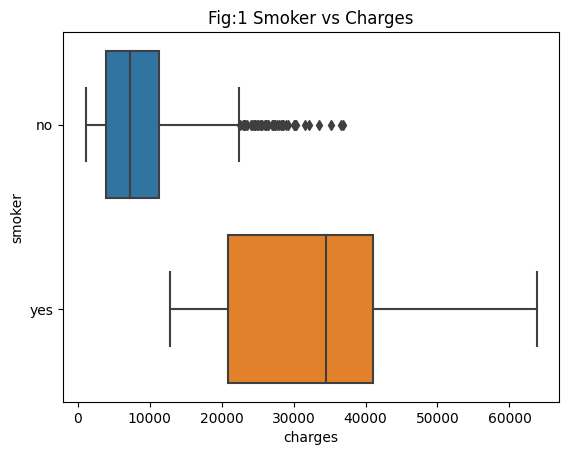

In [99]:
sns.boxplot(x=insured.charges,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [101]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [102]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


Step 5: Decide whethere to reject or failed to reject null hypothesis

We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

##2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Let  μ1μ2
  and be the respective population means for BMI of males and BMI of females

Step 1: Define null and alternative hypothesis

 H0:μ1−μ2=0

  There is no difference between the BMI of Male and BMI of female.

 Ha:μ1−μ2!=0

  There is difference between the BMI of Male and BMI of female.

Step 2: Decide the significance level
α = 0.05

Step 3:Identify the test
Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

Step 4: Calculate the test-statistics and p-value

In [104]:
insured_male=insured.loc[insured.sex=='male']
insured_male

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
8,37,male,29.830,2,no,25-35,28-38,northeast,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,25-35,28-38,northwest,4239.89265
1325,61,male,33.535,0,no,25-35,58-68,northeast,13143.33665
1327,51,male,30.030,1,no,25-35,48-58,southeast,9377.90470
1329,52,male,38.600,2,no,35-45,48-58,southwest,10325.20600


In [105]:
insured_female=insured.loc[insured.sex=='female']
insured_female


,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.90,0,yes,25-35,18-28,southwest,16884.92400
5,31,female,25.74,0,no,25-35,28-38,southeast,3756.62160
6,46,female,33.44,1,no,25-35,38-48,southeast,8240.58960
7,37,female,27.74,3,no,25-35,28-38,northwest,7281.50560
9,60,female,25.84,0,no,25-35,58-68,northwest,28923.13692
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,35-45,48-58,southwest,11411.68500
1334,18,female,31.92,0,no,25-35,NaN,northeast,2205.98080
1335,18,female,36.85,0,no,35-45,NaN,southeast,1629.83350
1336,21,female,25.80,0,no,25-35,18-28,southwest,2007.94500


In [108]:
insured_male = insured_male.bmi
insured_female = insured_female.bmi

<Axes: xlabel='bmi', ylabel='Density'>

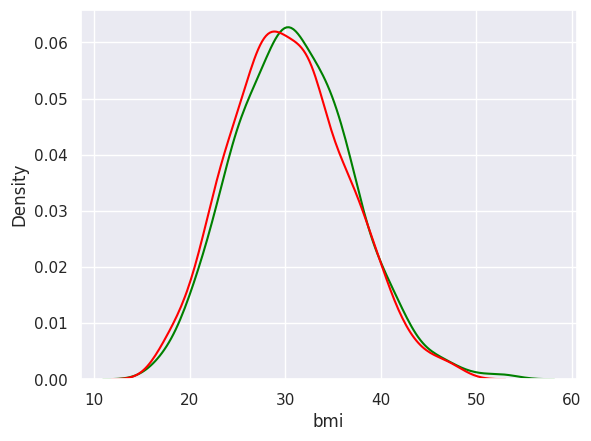

In [110]:
sns.distplot(insured_male,color='green',hist=False)
sns.distplot(insured_female,color='red',hist=False)

In [113]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(insured_male, insured_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984932


In [114]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


Step 5: Decide to reject or accept null hypothesis
We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

Step 1: Define null and alternative hypotheses * H0 Smokers proportions is not significantly different across different regions * Ha Smokers proportions is different across different regions

Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.

Step 4: Calculate the test-statistics and p-value

In [115]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

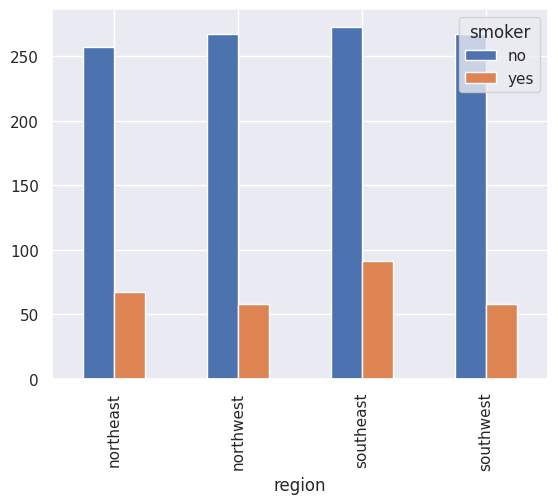

In [116]:
 contigency.plot(kind='bar')

In [117]:
# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [118]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


Step 5: Decide to reject or accept null hypothesis
We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.

##4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

Step 1: Define null and alternative hypotheses
* H0: μ1 = μ2 = μ3 The mean BMI of women with no children , one child,two children is same

* Ha: Atleast one of mean BMI of women is not same

Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
One-way ANOVA - Equality of population through variances of samples.

Step 4: Calculate the test-statistics and p-value

In [123]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = insured.loc[insured['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.900,0,yes,25-35,18-28,southwest,16884.92400
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520
5,31,female,25.740,0,no,25-35,28-38,southeast,3756.62160


In [124]:
#pd.pivot_table(data=df_female_filtered,index=df_female_filtered.children,columns=df_female_filtered.bmi,values=df_female_filtered.bmi,fill_value=0)
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.550296
1    30.623148
2    30.978104
Name: bmi, dtype: float64

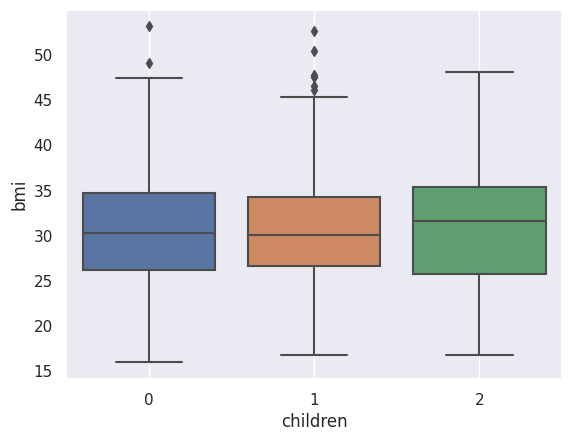

In [125]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [126]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,31.631915,15.815957,0.416983,0.659133
Residual,1135.0,43049.991501,37.929508,NaN,NaN


Step 5: Decide to reject or accept null hypothesis
P value is 0.0.659133 and it is greater than aplha(0.05) ,We failed to reject the null hypothesis and conclude that mean Bmi of women with no children,one children, two children is same.

##Recommendation

Based on EDA and statistical evidence it can be seen that customer who smoke or have higher BMI have more higher claims. We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
We can have Active wellness programs which can help up reduce claims related to BMI.
High BMI is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
Provide discount coupons for Gym or fitness devices encouraging customers to exercise.